In [88]:
import os
import xml.etree.ElementTree as ET
import os 
import numpy as np
import pprint as pprint 
import argparse
import matplotlib.pyplot as plt 
from pprint import pprint
import pandas as pd 

In [196]:
def get_flow_data_with_probs(path_to_flow_file):
    tree = ET.parse(os.path.abspath(path_to_flow_file))
    root = tree.getroot()

    flows = {}
    total_no_flows = 0
    unique_probs = []
    for flow in root.findall("flow"):
        total_no_flows +=1 
        from_edge, to_edge = (flow.get('from'), flow.get('to'))
        probability = flow.get('probability')
        probability = float(probability)
        if probability not in unique_probs:
            unique_probs.append(probability)
        flows[(from_edge, to_edge)] = probability
    
    return flows, total_no_flows, unique_probs

In [89]:
def get_flow_data(path_to_flow_file, simulation_time):
    tree = ET.parse(os.path.abspath(path_to_flow_file))
    root = tree.getroot()

    flows = {}
    total_no_flows = 0
    unique_probs = []
    for flow in root.findall("flow"):
        total_no_flows +=1 
        from_edge, to_edge = (flow.get('from'), flow.get('to'))
        probability = flow.get('probability')
        probability = float(probability)
        if probability not in unique_probs:
            unique_probs.append(probability)
        no_vehicles_in_route = probability * simulation_time
        flows[(from_edge, to_edge)] = no_vehicles_in_route
    
    return flows, total_no_flows, unique_probs

In [90]:
path_to_flow_file = "data/4x4grid_similar_to_resco_for_train/flow_file_tps_constant_for_10000s_with_scaled_route_distrib.rou.xml"
simulation_time = 5000
flows_1, total_no_flows_1, unique_probs_1  = get_flow_data(path_to_flow_file, simulation_time)
print("total_no_flows:", total_no_flows_1)
print("unique_probs:", unique_probs_1)

total_no_flows: 255
unique_probs: [0.0013888888888888887, 0.0019444444444444444, 0.0022222222222222222, 0.0016666666666666668, 0.0030555555555555553, 0.0025, 0.0011111111111111111, 0.0027777777777777775, 0.0033333333333333335, 0.0036111111111111105, 0.0008333333333333334, 0.0005555555555555556, 0.0002777777777777778]


In [91]:
unique_probs = np.array([float(x) for x in unique_probs_1], dtype=float)

In [92]:
unique_probs.max()

0.0036111111111111105

In [93]:
unique_probs.min()

0.0002777777777777778

Text(0, 0.5, 'Unique No of start-end routes')

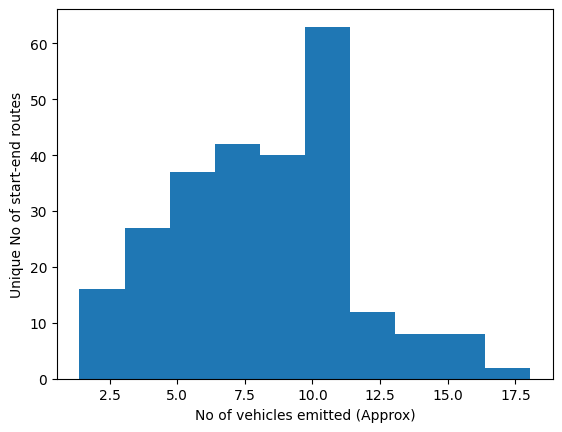

In [94]:
plt.hist(flows_1.values())
plt.xlabel('No of vehicles emitted (Approx)')
plt.ylabel('Unique No of start-end routes')

In [299]:
start_end_vehicle_data = pd.DataFrame(list(flows_1.values()), index=list(flows_1.keys()), columns=['no_vehicles'])

print(start_end_vehicle_data.to_csv())

,no_vehicles
"('top3D3', 'D3top3')",6.944444444444444
"('left0A0', 'A3top0')",6.944444444444444
"('left0A0', 'B0bottom1')",9.722222222222221
"('right3D3', 'A0bottom0')",6.944444444444444
"('left2A2', 'A2left2')",11.11111111111111
"('bottom1B0', 'B3top1')",8.333333333333334
"('bottom1B0', 'A0left0')",6.944444444444444
"('top1B3', 'D3top3')",9.722222222222221
"('top2C3', 'D3top3')",9.722222222222221
"('top1B3', 'D0right0')",15.277777777777777
"('bottom2C0', 'D2right2')",11.11111111111111
"('left1A1', 'A1left1')",8.333333333333334
"('top3D3', 'D0right0')",6.944444444444444
"('right1D1', 'D3top3')",6.944444444444444
"('right0D0', 'D2right2')",9.722222222222221
"('left0A0', 'D0right0')",12.5
"('left2A2', 'B3top1')",8.333333333333334
"('bottom2C0', 'D3right3')",9.722222222222221
"('left0A0', 'D3right3')",8.333333333333334
"('right2D2', 'C0bottom2')",11.11111111111111
"('top0A3', 'C0bottom2')",9.722222222222221
"('bottom2C0', 'D1right1')",9.722222222222221
"('bottom2C0', 'B0bottom1')",9.72222

In [166]:
start_end_vehicle_data.describe()

,no_vehicles
count,255.000000
mean,8.022876
std,3.265685
min,1.388889
25%,5.555556
50%,8.333333
75%,9.722222
max,18.055556


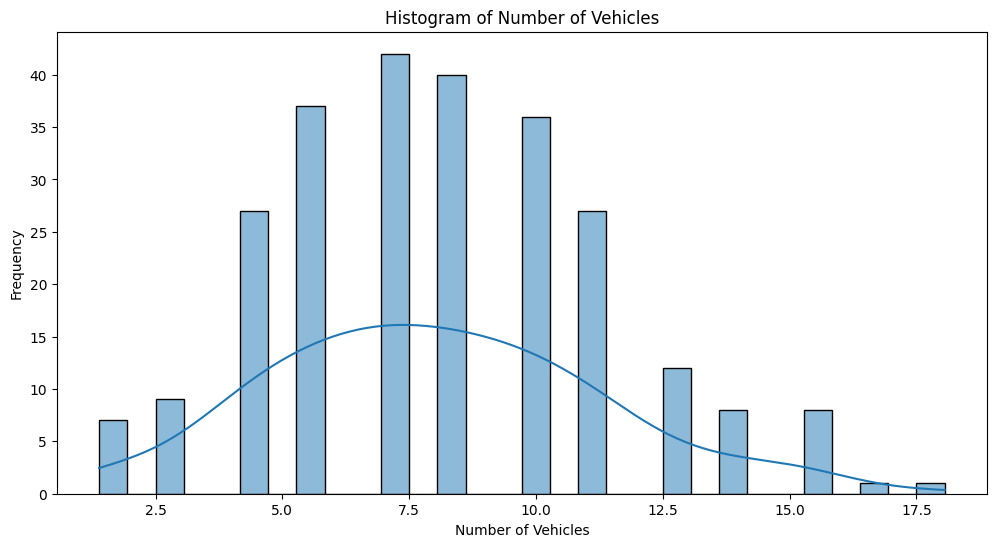

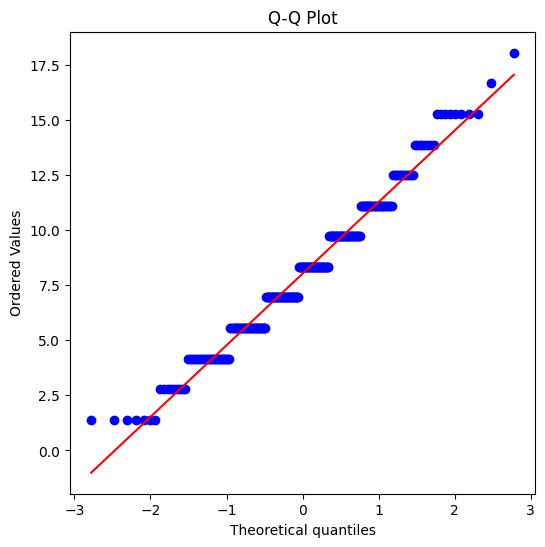

Shapiro-Wilk Test: W=0.9744770526885986, p-value=0.0001535825285827741


In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


#Histogram
plt.figure(figsize=(12, 6))
sns.histplot(start_end_vehicle_data['no_vehicles'], kde=True, bins=30)
plt.title('Histogram of Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(start_end_vehicle_data['no_vehicles'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(start_end_vehicle_data['no_vehicles'])
print(f'Shapiro-Wilk Test: W={shapiro_test[0]}, p-value={shapiro_test[1]}')

In [184]:
start_end_vehicle_data_larger_8 = start_end_vehicle_data[start_end_vehicle_data['no_vehicles'] > 8 ]
start_end_vehicle_data_larger_8

,no_vehicles
"(left0A0, B0bottom1)",9.722222
"(left2A2, A2left2)",11.111111
"(bottom1B0, B3top1)",8.333333
"(top1B3, D3top3)",9.722222
"(top2C3, D3top3)",9.722222
...,...
"(top3D3, C3top2)",9.722222
"(top2C3, D0right0)",13.888889
"(bottom0A0, A2left2)",8.333333
"(top2C3, A1left1)",8.333333


In [186]:
start_end_vehicle_data_larger_8[start_end_vehicle_data_larger_8['no_vehicles'] < 12 ]

,no_vehicles
"(left0A0, B0bottom1)",9.722222
"(left2A2, A2left2)",11.111111
"(bottom1B0, B3top1)",8.333333
"(top1B3, D3top3)",9.722222
"(top2C3, D3top3)",9.722222
...,...
"(bottom2C0, A3left3)",8.333333
"(top3D3, C3top2)",9.722222
"(bottom0A0, A2left2)",8.333333
"(top2C3, A1left1)",8.333333


In [98]:
tree = ET.parse(os.path.abspath(path_to_flow_file))
root = tree.getroot()

# Extract the start and end points of the routes
routes = []
for flow in root.findall('flow'):
    from_route = flow.get('from')
    to_route = flow.get('to')
    routes.append((from_route, to_route))
print(routes)
# Create a DataFrame from the routes
routes_df = pd.DataFrame(routes, columns=['From', 'To'])

routes_df

[('top3D3', 'D3top3'), ('left0A0', 'A3top0'), ('left0A0', 'B0bottom1'), ('right3D3', 'A0bottom0'), ('left2A2', 'A2left2'), ('bottom1B0', 'B3top1'), ('bottom1B0', 'A0left0'), ('top1B3', 'D3top3'), ('top2C3', 'D3top3'), ('top1B3', 'D0right0'), ('bottom2C0', 'D2right2'), ('left1A1', 'A1left1'), ('top3D3', 'D0right0'), ('right1D1', 'D3top3'), ('right0D0', 'D2right2'), ('left0A0', 'D0right0'), ('left2A2', 'B3top1'), ('bottom2C0', 'D3right3'), ('left0A0', 'D3right3'), ('right2D2', 'C0bottom2'), ('top0A3', 'C0bottom2'), ('bottom2C0', 'D1right1'), ('bottom2C0', 'B0bottom1'), ('right3D3', 'D3top3'), ('bottom0A0', 'B3top1'), ('bottom1B0', 'A3left3'), ('top0A3', 'B0bottom1'), ('right2D2', 'A3left3'), ('left3A3', 'B3top1'), ('top2C3', 'D3right3'), ('left1A1', 'D1right1'), ('left1A1', 'D3top3'), ('top0A3', 'A0left0'), ('left2A2', 'D3top3'), ('right3D3', 'A0left0'), ('top3D3', 'A3left3'), ('top1B3', 'A0left0'), ('right0D0', 'B0bottom1'), ('right1D1', 'A3left3'), ('left0A0', 'D0bottom3'), ('top0A3', 

,From,To
0,top3D3,D3top3
1,left0A0,A3top0
2,left0A0,B0bottom1
3,right3D3,A0bottom0
4,left2A2,A2left2
...,...,...
250,top0A3,A0bottom0
251,bottom3D0,A0bottom0
252,left2A2,A0left0
253,left2A2,D0right0


## Generate graph with start end routes color coded

In [281]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Generate 255 distinct colors
def generate_distinct_colors(num_colors):
    # Use matplotlib's tab20c colormap as base and repeat it to reach 255 colors
    base_colors = plt.cm.tab20c(np.linspace(0, 1, 20))
    extended_colors = np.tile(base_colors, (13, 1))[:num_colors]
    
    # Convert to hex
    hex_colors = [mcolors.rgb2hex(color) for color in extended_colors]
    return hex_colors

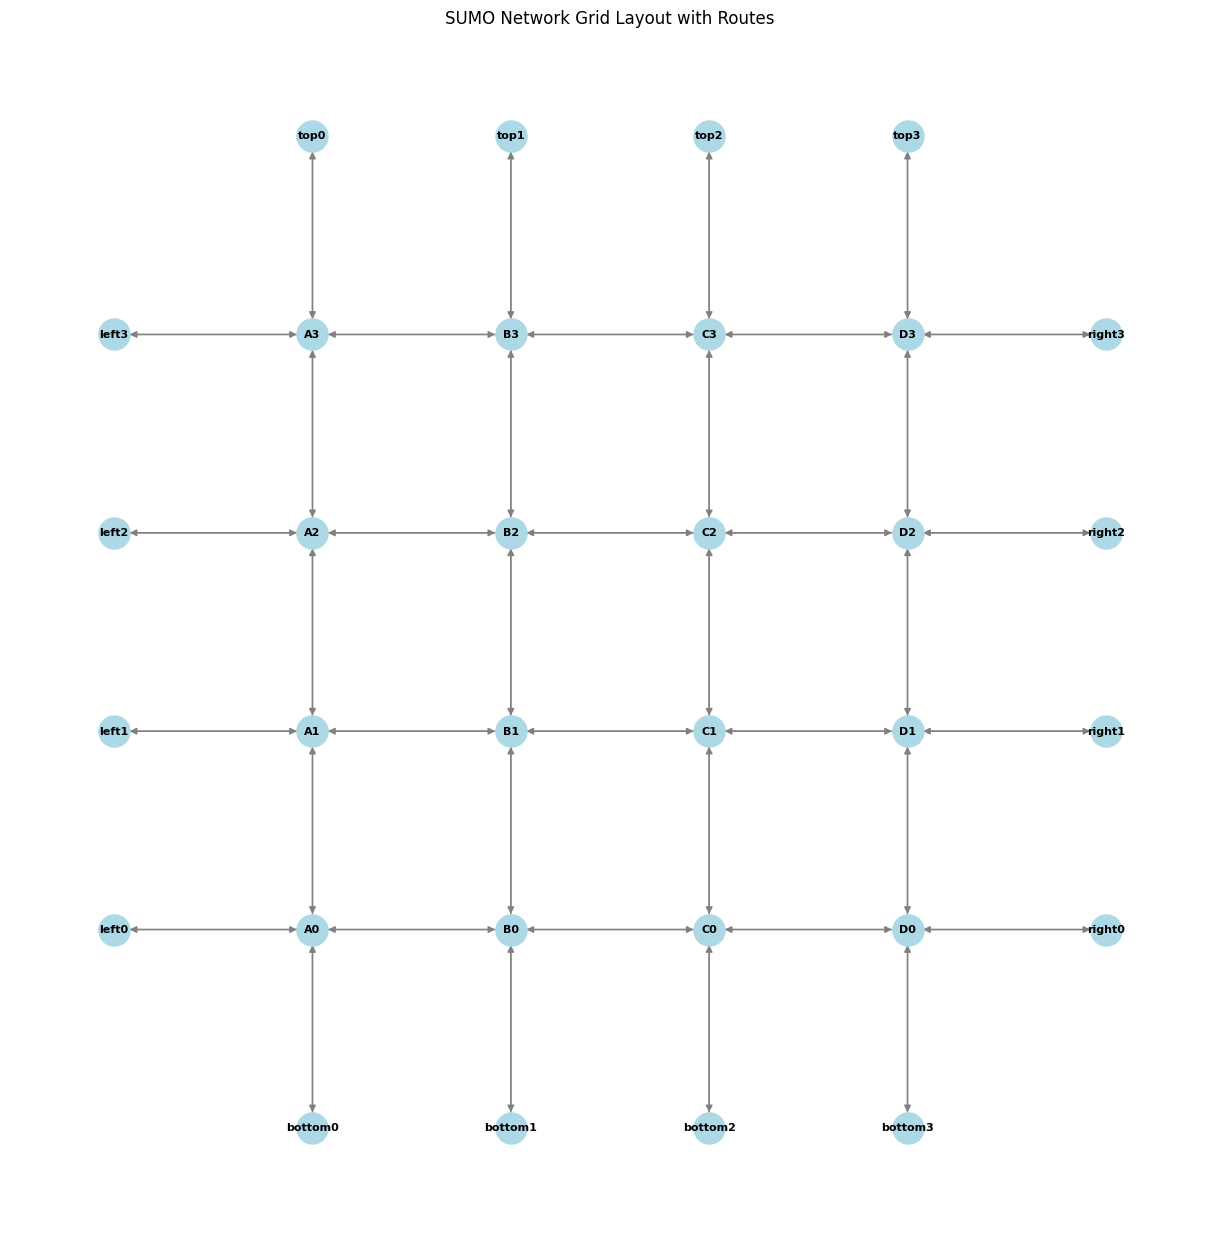

In [296]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import networkx as nx

# Paths to your SUMO network file and flow file
network_file_path = network_file_path
flow_file_path = path_to_flow_file

# Parse the network file to get edges and junctions
network_tree = ET.parse(network_file_path)
network_root = network_tree.getroot()

edges = {}
junctions = {}

# Extract junctions
for junction in network_root.findall('junction'):
    j_id = junction.get('id')
    x = float(junction.get('x'))
    y = float(junction.get('y'))
    junctions[j_id] = (x, y)

# Extract edges
for edge in network_root.findall('edge'):
    if str(edge.get('function')) != 'internal':
        edge_id = edge.get('id')
        from_node = edge.get('from')
        to_node = edge.get('to')
        edges[edge_id] = (from_node, to_node)

# Parse the flow file to get the unique routes
flow_tree = ET.parse(flow_file_path)
flow_root = flow_tree.getroot()

unique_routes = set()
for flow in flow_root.findall('flow'):
    from_edge = flow.get('from')
    to_edge = flow.get('to')
    if from_edge in edges and to_edge in edges:
        unique_routes.add((from_edge, to_edge))

# Define a grid layout manually
pos = {
    'A3': (0, 3), 'B3': (1, 3), 'C3': (2, 3), 'D3': (3, 3),
    'A2': (0, 2), 'B2': (1, 2), 'C2': (2, 2), 'D2': (3, 2),
    'A1': (0, 1), 'B1': (1, 1), 'C1': (2, 1), 'D1': (3, 1),
    'A0': (0, 0), 'B0': (1, 0), 'C0': (2, 0), 'D0': (3, 0),
    'left0': (-1, 0), 'left1': (-1, 1), 'left2': (-1, 2), 'left3': (-1, 3),
    'right0': (4, 0), 'right1': (4, 1), 'right2': (4, 2), 'right3': (4, 3),
    'bottom0': (0, -1), 'bottom1': (1, -1), 'bottom2': (2, -1), 'bottom3': (3, -1),
    'top0': (0, 4), 'top1': (1, 4), 'top2': (2, 4), 'top3': (3, 4)
}

# Create the graph
G = nx.DiGraph()

# Add nodes (junctions) to the graph
for node in pos.keys():
    G.add_node(node, pos=pos[node])

# Add edges to the graph
for edge_id, (from_node, to_node) in edges.items():
    G.add_edge(from_node, to_node, edge_id=edge_id)

colours = generate_distinct_colors(len(unique_routes))

# unique_route_count = 0 
# # Add unique routes to the graph
# for from_edge, to_edge in list(unique_routes):
#     from_node = edges[from_edge][0]
#     to_node = edges[to_edge][1]
#     G.add_edge(from_node, to_node, color = colours[unique_route_count], weight=5, edge_id=f"{from_edge}->{to_edge}")
#     unique_route_count += 1

# Extract positions and edge colors for visualization
pos = nx.get_node_attributes(G, 'pos')
edges = G.edges(data=True)
edge_colors = [edge[2].get('color', 'gray') for edge in edges]
edge_weights = [edge[2].get('weight', 1) for edge in edges]

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold', edge_color=edge_colors, width=edge_weights, arrows=True)
plt.title('SUMO Network Grid Layout with Routes')
plt.show()

In [195]:
start_end_vehicle_data

,no_vehicles
"(top3D3, D3top3)",6.944444
"(left0A0, A3top0)",6.944444
"(left0A0, B0bottom1)",9.722222
"(right3D3, A0bottom0)",6.944444
"(left2A2, A2left2)",11.111111
...,...
"(top0A3, A0bottom0)",1.388889
"(bottom3D0, A0bottom0)",1.388889
"(left2A2, A0left0)",5.555556
"(left2A2, D0right0)",2.777778


In [237]:
flow_data_1_with_probs, no_unique_routes, unique_probs = get_flow_data_with_probs(path_to_flow_file)

array([0.00139, 0.00194, 0.00222, 0.00167, 0.00306, 0.0025 , 0.00111,
       0.00278, 0.00333, 0.00361, 0.00083, 0.00056, 0.00028])

In [346]:
flow_data_1_with_probs_df = pd.DataFrame(list(flow_data_1_with_probs.values()), index= flow_data_1_with_probs.keys(), columns=['probability'])

In [380]:
flow_data_1_with_probs_df

probability  cluster
top3D3    D3top3        0.001389        1
left0A0   A3top0        0.001389        1
          B0bottom1     0.001944        0
right3D3  A0bottom0     0.001389        1
left2A2   A2left2       0.002222        0
...                          ...      ...
top0A3    A0bottom0     0.000278        1
bottom3D0 A0bottom0     0.000278        1
left2A2   A0left0       0.001111        1
          D0right0      0.000556        1
left1A1   C0bottom2     0.000278        1

[255 rows x 2 columns]

## from to routes

In [384]:
from_edges = [from_edge for from_edge, to_edge in list(flow_data_1_with_probs_df.index)]
to_edges = [to_edge for from_edge, to_edge in list(flow_data_1_with_probs_df.index)]

flow_data_1_with_probs_df.index
from_to_prob_df = pd.DataFrame({'from': from_edges, 
                   'to':to_edges, 
                   'probability':flow_data_1_with_probs_df['probability']})

In [388]:
from_to_prob_df

from         to  probability
top3D3    D3top3        top3D3     D3top3     0.001389
left0A0   A3top0       left0A0     A3top0     0.001389
          B0bottom1    left0A0  B0bottom1     0.001944
right3D3  A0bottom0   right3D3  A0bottom0     0.001389
left2A2   A2left2      left2A2    A2left2     0.002222
...                        ...        ...          ...
top0A3    A0bottom0     top0A3  A0bottom0     0.000278
bottom3D0 A0bottom0  bottom3D0  A0bottom0     0.000278
left2A2   A0left0      left2A2    A0left0     0.001111
          D0right0     left2A2   D0right0     0.000556
left1A1   C0bottom2    left1A1  C0bottom2     0.000278

[255 rows x 3 columns]

/Users/loveen/.pyenv/versions/3.9.10/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


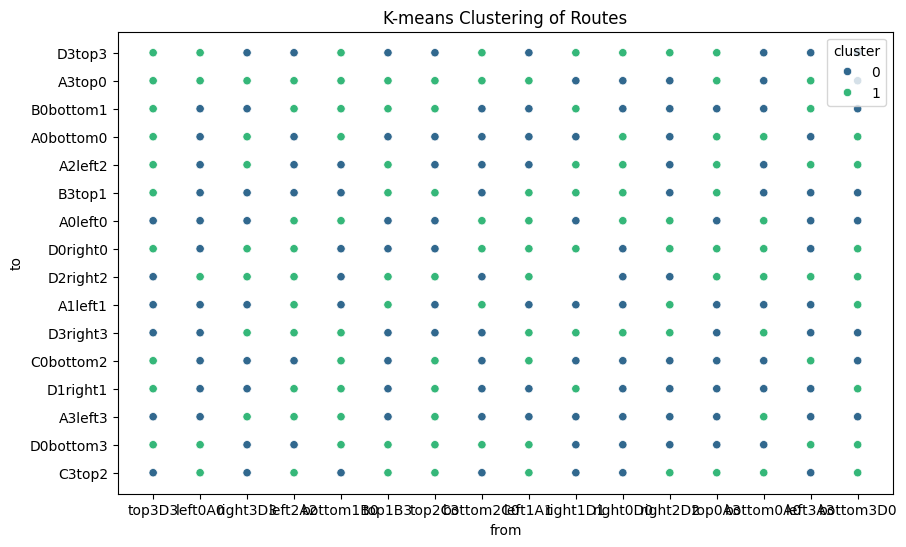

In [394]:
from sklearn.cluster import KMeans
# Step 3: Clustering
kmeans = KMeans(n_clusters=2)
from_to_prob_df['cluster'] = kmeans.fit_predict(np.array(from_to_prob_df['probability']).reshape(-1,1))
plt.figure(figsize=(10, 6))

sns.scatterplot(x="from", y="to", hue="cluster", data=from_to_prob_df, palette="viridis")
plt.title('K-means Clustering of Routes')
plt.show()

<Axes: >

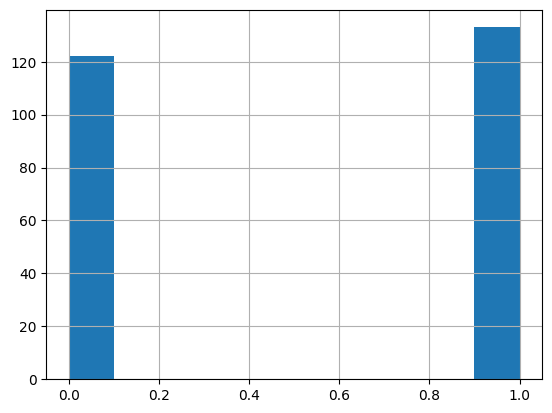

In [391]:
from_to_prob_df['cluster'].hist()

In [392]:
from_to_prob_df['cluster']

top3D3     D3top3       0
left0A0    A3top0       0
           B0bottom1    1
right3D3   A0bottom0    0
left2A2    A2left2      1
                       ..
top0A3     A0bottom0    0
bottom3D0  A0bottom0    0
left2A2    A0left0      0
           D0right0     0
left1A1    C0bottom2    0
Name: cluster, Length: 255, dtype: int32

In [393]:
flow_data_rounded = flow_data_1_with_probs_df[flow_data_1_with_probs_df > 0.002].dropna()
len(flow_data_rounded.index)

0

In [305]:
flow_data_1_with_probs_df.describe()

,probability
count,255.000000
mean,0.001605
std,0.000653
min,0.000278
25%,0.001111
50%,0.001667
75%,0.001944
max,0.003611


In [306]:
flow_data_1_with_vehicles_df = pd.DataFrame(list(flows_1.values()), index=list(flows_1.keys()), columns=['no_vehicles'])

In [307]:
np.round(flow_data_1_with_vehicles_df.iloc[:,:])

,no_vehicles
"(top3D3, D3top3)",7.0
"(left0A0, A3top0)",7.0
"(left0A0, B0bottom1)",10.0
"(right3D3, A0bottom0)",7.0
"(left2A2, A2left2)",11.0
...,...
"(top0A3, A0bottom0)",1.0
"(bottom3D0, A0bottom0)",1.0
"(left2A2, A0left0)",6.0
"(left2A2, D0right0)",3.0


(array([ 7., 36., 37., 42., 40., 63., 12.,  8.,  8.,  2.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

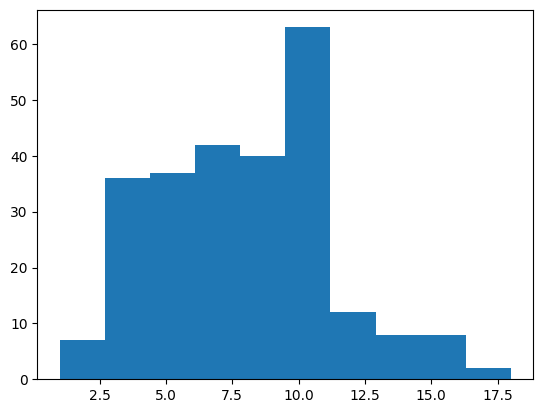

In [308]:
plt.hist(np.round(flow_data_1_with_vehicles_df.iloc[:,:]))

In [309]:
flow_data_1_with_vehicles_larger_3 = flow_data_1_with_vehicles_df[flow_data_1_with_vehicles_df>3]

flow_data_1_with_vehicles_between3_11 = flow_data_1_with_vehicles_larger_3[flow_data_1_with_vehicles_larger_3<11].dropna()

(array([27.,  0., 37.,  0., 42.,  0.,  0., 40.,  0., 36.]),
 array([4.16666667, 4.72222222, 5.27777778, 5.83333333, 6.38888889,
        6.94444444, 7.5       , 8.05555556, 8.61111111, 9.16666667,
        9.72222222]),
 <BarContainer object of 10 artists>)

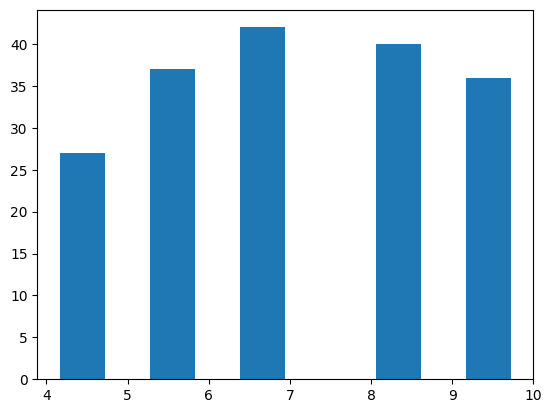

In [310]:
plt.hist(flow_data_1_with_vehicles_between3_11)

In [311]:
start_end_destinations_with_uniform_no_vehicles = list(flow_data_1_with_vehicles_between3_11.index)

In [312]:
len(start_end_destinations_with_uniform_no_vehicles)

182

In [313]:
start_end_destinations_with_uniform_no_vehicles

[('top3D3', 'D3top3'),
 ('left0A0', 'A3top0'),
 ('left0A0', 'B0bottom1'),
 ('right3D3', 'A0bottom0'),
 ('bottom1B0', 'B3top1'),
 ('bottom1B0', 'A0left0'),
 ('top1B3', 'D3top3'),
 ('top2C3', 'D3top3'),
 ('left1A1', 'A1left1'),
 ('top3D3', 'D0right0'),
 ('right1D1', 'D3top3'),
 ('right0D0', 'D2right2'),
 ('left2A2', 'B3top1'),
 ('bottom2C0', 'D3right3'),
 ('left0A0', 'D3right3'),
 ('top0A3', 'C0bottom2'),
 ('bottom2C0', 'D1right1'),
 ('bottom2C0', 'B0bottom1'),
 ('right3D3', 'D3top3'),
 ('bottom0A0', 'B3top1'),
 ('bottom1B0', 'A3left3'),
 ('top0A3', 'B0bottom1'),
 ('right2D2', 'A3left3'),
 ('left3A3', 'B3top1'),
 ('top2C3', 'D3right3'),
 ('left1A1', 'D1right1'),
 ('left2A2', 'D3top3'),
 ('right3D3', 'A0left0'),
 ('right0D0', 'B0bottom1'),
 ('right1D1', 'A3left3'),
 ('left0A0', 'D0bottom3'),
 ('left1A1', 'A2left2'),
 ('bottom1B0', 'B0bottom1'),
 ('bottom1B0', 'C3top2'),
 ('right3D3', 'B0bottom1'),
 ('top2C3', 'D0bottom3'),
 ('top2C3', 'C3top2'),
 ('right1D1', 'C0bottom2'),
 ('bottom0A0', 

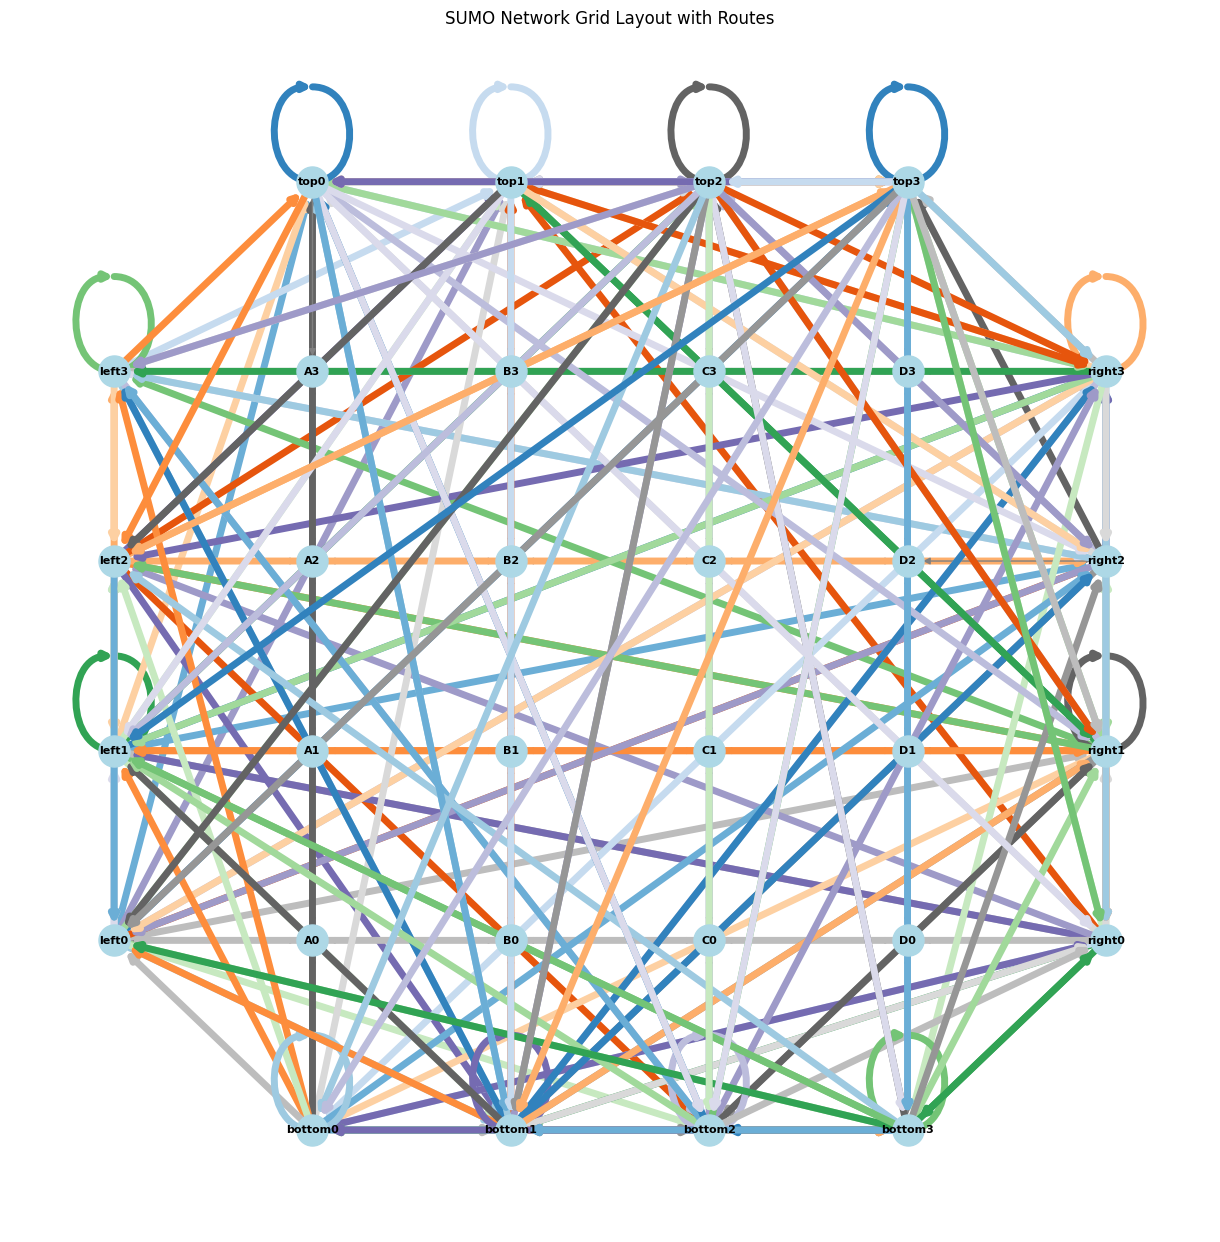

In [314]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import networkx as nx

# Paths to your SUMO network file and flow file
network_file_path = network_file_path
flow_file_path = path_to_flow_file

# Parse the network file to get edges and junctions
network_tree = ET.parse(network_file_path)
network_root = network_tree.getroot()

edges = {}
junctions = {}

# Extract junctions
for junction in network_root.findall('junction'):
    j_id = junction.get('id')
    x = float(junction.get('x'))
    y = float(junction.get('y'))
    junctions[j_id] = (x, y)

# Extract edges
for edge in network_root.findall('edge'):
    if str(edge.get('function')) != 'internal':
        edge_id = edge.get('id')
        from_node = edge.get('from')
        to_node = edge.get('to')
        edges[edge_id] = (from_node, to_node)

# Parse the flow file to get the unique routes
flow_tree = ET.parse(flow_file_path)
flow_root = flow_tree.getroot()

unique_routes = set()
for flow in flow_root.findall('flow'):
    from_edge = flow.get('from')
    to_edge = flow.get('to')
    if from_edge in edges and to_edge in edges:
        unique_routes.add((from_edge, to_edge))

# Define a grid layout manually
pos = {
    'A3': (0, 3), 'B3': (1, 3), 'C3': (2, 3), 'D3': (3, 3),
    'A2': (0, 2), 'B2': (1, 2), 'C2': (2, 2), 'D2': (3, 2),
    'A1': (0, 1), 'B1': (1, 1), 'C1': (2, 1), 'D1': (3, 1),
    'A0': (0, 0), 'B0': (1, 0), 'C0': (2, 0), 'D0': (3, 0),
    'left0': (-1, 0), 'left1': (-1, 1), 'left2': (-1, 2), 'left3': (-1, 3),
    'right0': (4, 0), 'right1': (4, 1), 'right2': (4, 2), 'right3': (4, 3),
    'bottom0': (0, -1), 'bottom1': (1, -1), 'bottom2': (2, -1), 'bottom3': (3, -1),
    'top0': (0, 4), 'top1': (1, 4), 'top2': (2, 4), 'top3': (3, 4)
}

# Create the graph
G = nx.DiGraph()

# Add nodes (junctions) to the graph
for node in pos.keys():
    G.add_node(node, pos=pos[node])

# Add edges to the graph
for edge_id, (from_node, to_node) in edges.items():
    G.add_edge(from_node, to_node, edge_id=edge_id)

# GET DISTINCT COLOURS 
colours = generate_distinct_colors(len(unique_routes))

# Add ROUTES TO GRAPH
unique_route_count = 0 
# Add unique routes to the graph
for from_edge, to_edge in list(start_end_destinations_with_uniform_no_vehicles):
    from_node = edges[from_edge][0]
    to_node = edges[to_edge][1]
    G.add_edge(from_node, to_node, color = colours[unique_route_count], weight=5, edge_id=f"{from_edge}->{to_edge}")
    unique_route_count += 1

# Extract positions and edge colors for visualization
pos = nx.get_node_attributes(G, 'pos')
edges = G.edges(data=True)
edge_colors = [edge[2].get('color', 'gray') for edge in edges]
edge_weights = [edge[2].get('weight', 1) for edge in edges]

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold', edge_color=edge_colors, width=edge_weights, arrows=True)
plt.title('SUMO Network Grid Layout with Routes')
plt.show()

In [315]:
unique_route_count

182

## High Distribution Routes

In [429]:
flow_data_1_with_vehicles_df.describe()

,no_vehicles
count,255.000000
mean,8.022876
std,3.265685
min,1.388889
25%,5.555556
50%,8.333333
75%,9.722222
max,18.055556


In [431]:
flow_data_1_with_vehicles_subset_df = flow_data_1_with_vehicles_df[flow_data_1_with_vehicles_df>6].dropna()
flow_data_1_with_vehicles_subset_df = flow_data_1_with_vehicles_subset_df[flow_data_1_with_vehicles_subset_df<11].dropna()

In [432]:
flow_data_1_with_vehicles_subset_df.describe()

,no_vehicles
count,118.000000
mean,8.262712
std,1.131803
min,6.944444
25%,6.944444
50%,8.333333
75%,9.722222
max,9.722222


In [433]:
start_end_destinations = list(flow_data_1_with_vehicles_subset_df.index)

In [434]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import networkx as nx
def display_routes(start_end_destinations:pd.DataFrame, network_file_path:str, path_to_flow_file):
    # Paths to your SUMO network file and flow file
    network_file_path = network_file_path
    flow_file_path = path_to_flow_file

    # Parse the network file to get edges and junctions
    network_tree = ET.parse(network_file_path)
    network_root = network_tree.getroot()

    edges = {}
    junctions = {}

    # Extract junctions
    for junction in network_root.findall('junction'):
        j_id = junction.get('id')
        x = float(junction.get('x'))
        y = float(junction.get('y'))
        junctions[j_id] = (x, y)

    # Extract edges
    for edge in network_root.findall('edge'):
        if str(edge.get('function')) != 'internal':
            edge_id = edge.get('id')
            from_node = edge.get('from')
            to_node = edge.get('to')
            edges[edge_id] = (from_node, to_node)

    # Parse the flow file to get the unique routes
    flow_tree = ET.parse(flow_file_path)
    flow_root = flow_tree.getroot()

    unique_routes = set()
    for flow in flow_root.findall('flow'):
        from_edge = flow.get('from')
        to_edge = flow.get('to')
        if from_edge in edges and to_edge in edges:
            unique_routes.add((from_edge, to_edge))

    # Define a grid layout manually
    pos = {
        'A3': (0, 3), 'B3': (1, 3), 'C3': (2, 3), 'D3': (3, 3),
        'A2': (0, 2), 'B2': (1, 2), 'C2': (2, 2), 'D2': (3, 2),
        'A1': (0, 1), 'B1': (1, 1), 'C1': (2, 1), 'D1': (3, 1),
        'A0': (0, 0), 'B0': (1, 0), 'C0': (2, 0), 'D0': (3, 0),
        'left0': (-1, 0), 'left1': (-1, 1), 'left2': (-1, 2), 'left3': (-1, 3),
        'right0': (4, 0), 'right1': (4, 1), 'right2': (4, 2), 'right3': (4, 3),
        'bottom0': (0, -1), 'bottom1': (1, -1), 'bottom2': (2, -1), 'bottom3': (3, -1),
        'top0': (0, 4), 'top1': (1, 4), 'top2': (2, 4), 'top3': (3, 4)
    }

    # Create the graph
    G = nx.DiGraph()

    # Add nodes (junctions) to the graph
    for node in pos.keys():
        G.add_node(node, pos=pos[node])

    # Add edges to the graph
    for edge_id, (from_node, to_node) in edges.items():
        G.add_edge(from_node, to_node, edge_id=edge_id)

    # GET DISTINCT COLOURS 
    colours = generate_distinct_colors(len(unique_routes))

    # Add ROUTES TO GRAPH
    unique_route_count = 0 
    # Add unique routes to the graph
    for from_edge, to_edge in list(start_end_destinations):
        from_node = edges[from_edge][0]
        to_node = edges[to_edge][1]
        G.add_edge(from_node, to_node, color = colours[unique_route_count], weight=5, edge_id=f"{from_edge}->{to_edge}")
        unique_route_count += 1

    # Extract positions and edge colors for visualization
    pos = nx.get_node_attributes(G, 'pos')
    edges = G.edges(data=True)
    edge_colors = [edge[2].get('color', 'gray') for edge in edges]
    edge_weights = [edge[2].get('weight', 1) for edge in edges]

    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold', edge_color=edge_colors, width=edge_weights, arrows=True)
    plt.title('SUMO Network Grid Layout with Routes')
    plt.show()


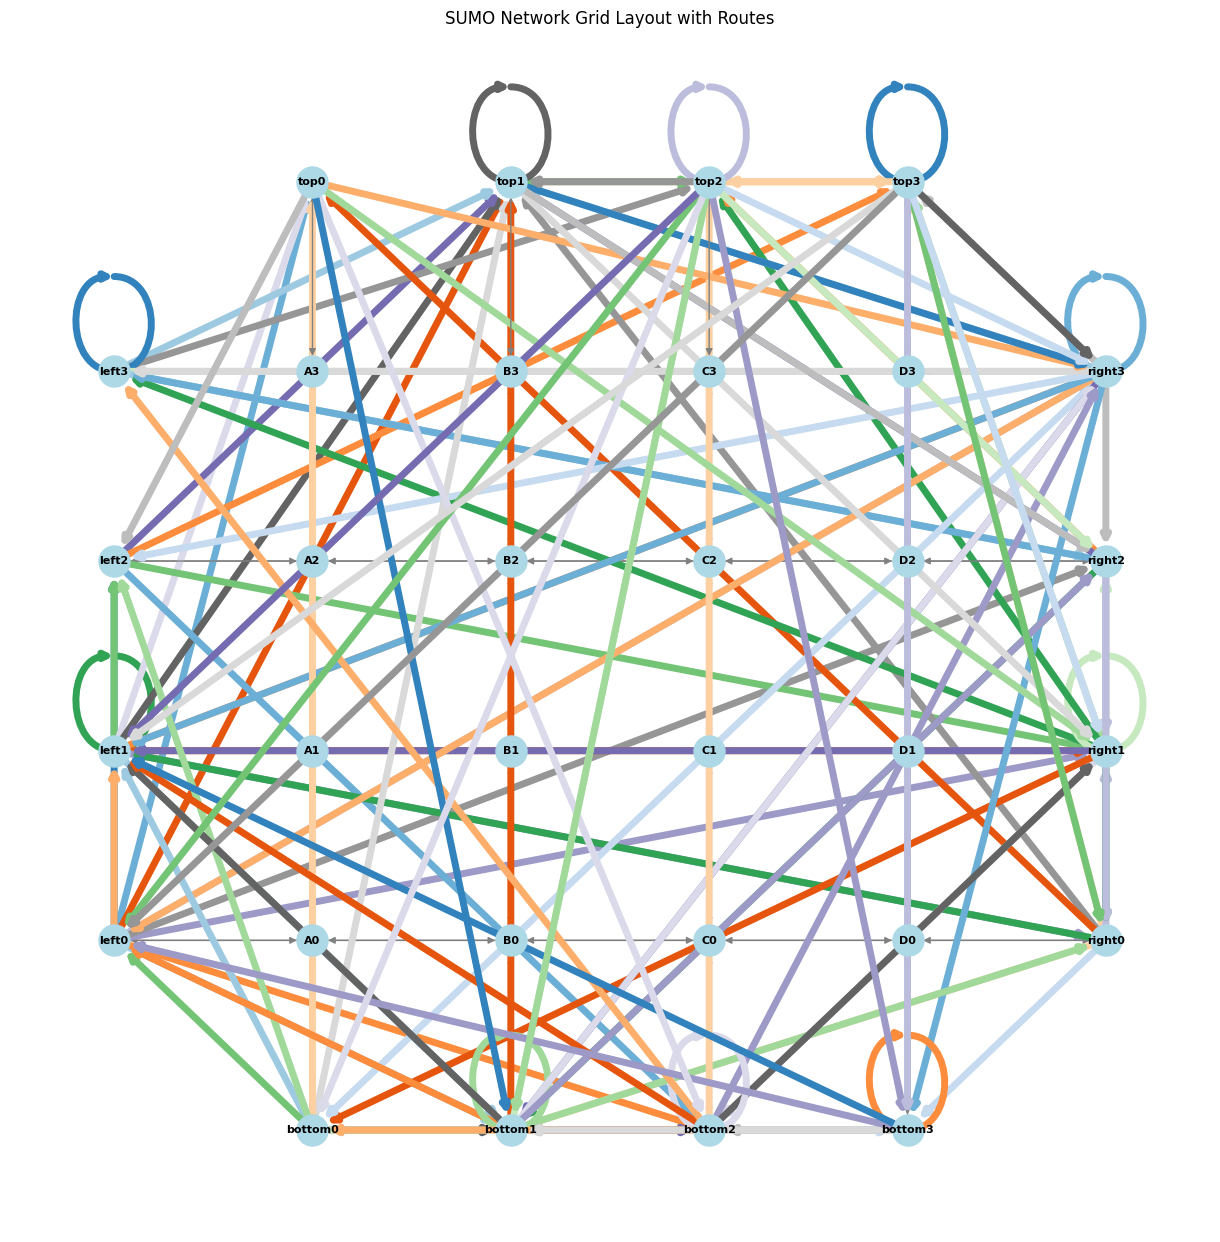

In [435]:
display_routes(start_end_destinations, network_file_path, path_to_flow_file)

## to, from, prob df 

In [382]:
from_edges = [from_edge for from_edge, to_edge in list(flow_data_1_with_probs_df.index)]
to_edges = [to_edge for from_edge, to_edge in list(flow_data_1_with_probs_df.index)]

flow_data_1_with_probs_df.index
from_to_prob_df = pd.DataFrame({'from': from_edges, 
                   'to':to_edges, 
                   'probability':flow_data_1_with_probs_df['probability']})


In [383]:
from_to_prob_df

from         to  probability
top3D3    D3top3        top3D3     D3top3     0.001389
left0A0   A3top0       left0A0     A3top0     0.001389
          B0bottom1    left0A0  B0bottom1     0.001944
right3D3  A0bottom0   right3D3  A0bottom0     0.001389
left2A2   A2left2      left2A2    A2left2     0.002222
...                        ...        ...          ...
top0A3    A0bottom0     top0A3  A0bottom0     0.000278
bottom3D0 A0bottom0  bottom3D0  A0bottom0     0.000278
left2A2   A0left0      left2A2    A0left0     0.001111
          D0right0     left2A2   D0right0     0.000556
left1A1   C0bottom2    left1A1  C0bottom2     0.000278

[255 rows x 3 columns]

## QUICK TEST TO SEE ROUTES PROB DISTRIB PATTERN

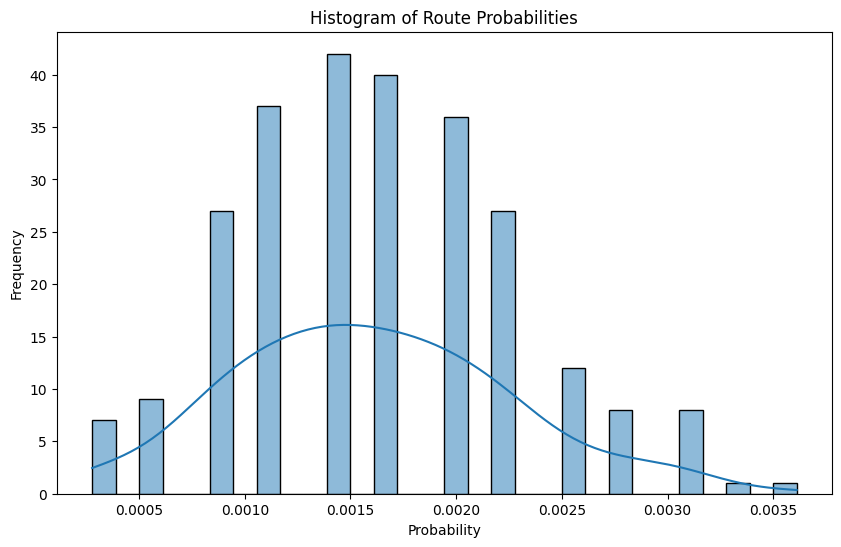

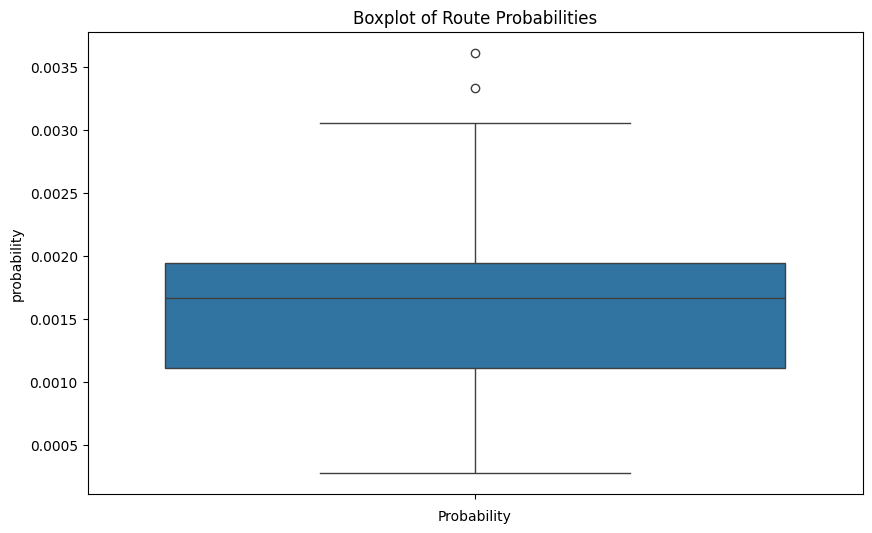

Descriptive Statistics:
 count    255.000000
mean       0.001605
std        0.000653
min        0.000278
25%        0.001111
50%        0.001667
75%        0.001944
max        0.003611
Name: probability, dtype: float64
Coefficient of Variation:  0.40704662295144817


/Users/loveen/.pyenv/versions/3.9.10/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/loveen/.pyenv/versions/3.9.10/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/loveen/.pyenv/versions/3.9.10/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/loveen/.pyenv/versions/3.9.10/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` wi

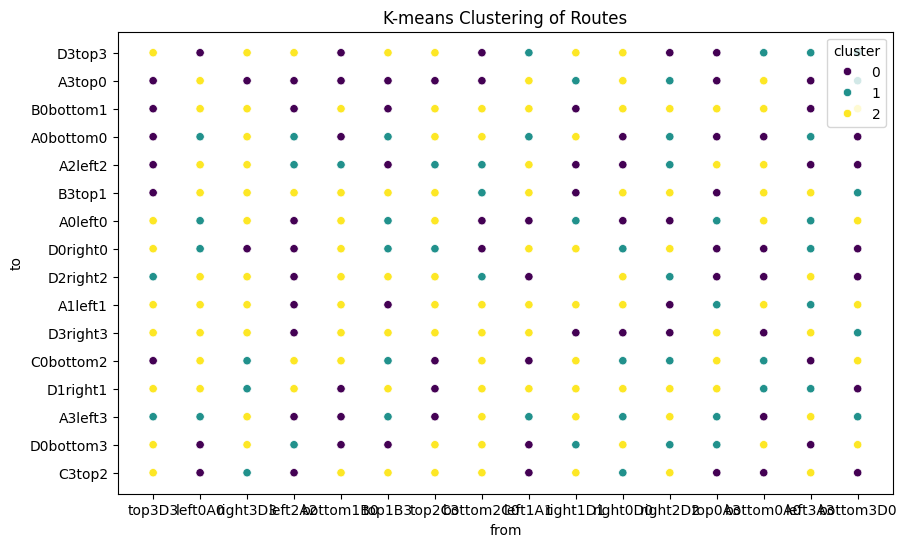

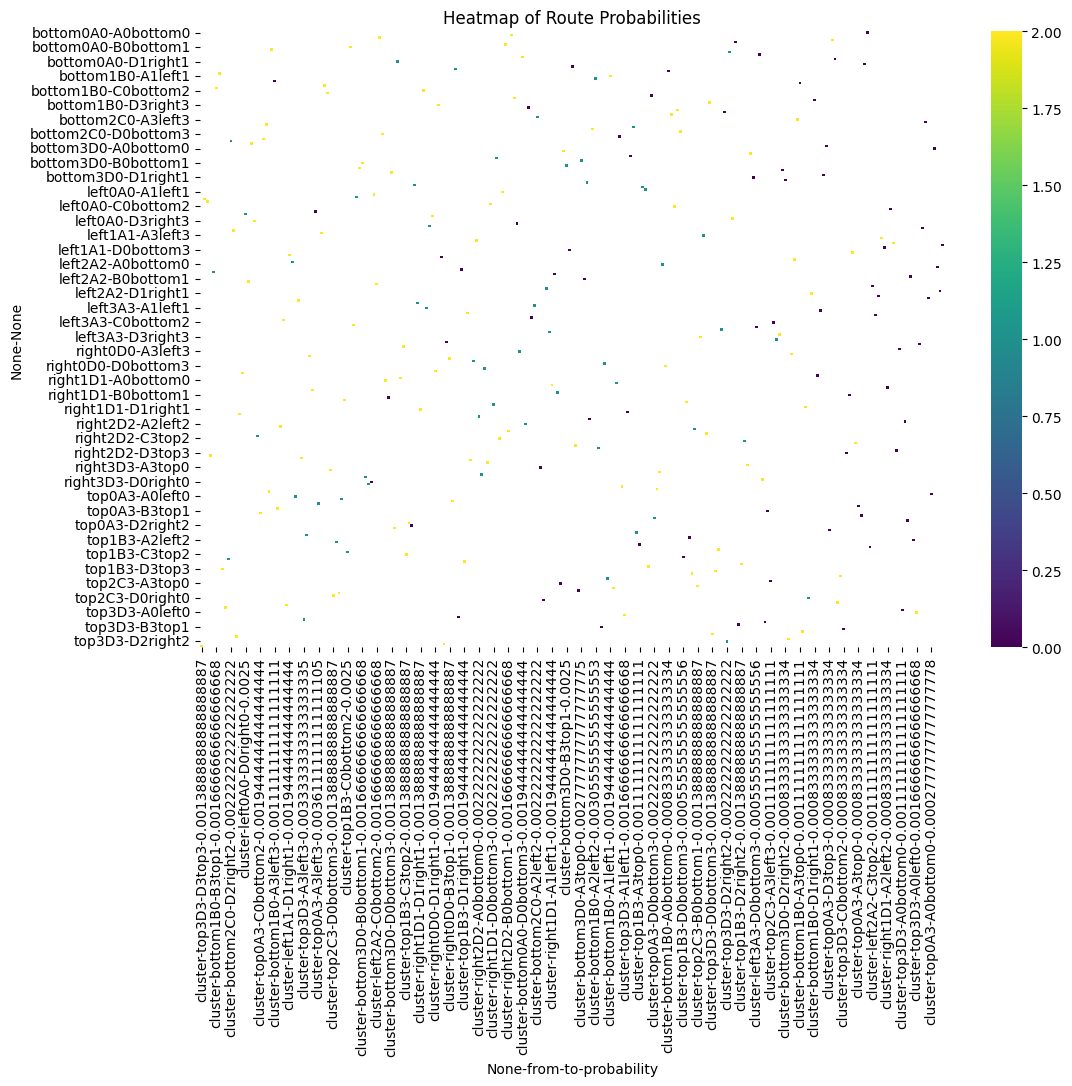

Chi-Square Test: chi2 = 70.69204371533834 , p-value = 1.1139060230836453e-11


In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import chi2_contingency

# Step 1: Visualization
plt.figure(figsize=(10, 6))
sns.histplot(from_to_prob_df['probability'], bins=30, kde=True)
plt.title('Histogram of Route Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(from_to_prob_df['probability'])
plt.title('Boxplot of Route Probabilities')
plt.xlabel('Probability')
plt.show()

# Step 2: Descriptive Statistics
desc_stats = from_to_prob_df['probability'].describe()
cv = from_to_prob_df['probability'].std() / from_to_prob_df['probability'].mean()
print("Descriptive Statistics:\n", desc_stats)
print("Coefficient of Variation: ", cv)

# Step 3: Clustering
kmeans = KMeans(n_clusters=3)
from_to_prob_df['cluster'] = kmeans.fit_predict(from_to_prob_df[['probability']])
plt.figure(figsize=(10, 6))
sns.scatterplot(x="from", y="to", hue="cluster", data=from_to_prob_df, palette="viridis")
plt.title('K-means Clustering of Routes')
plt.show()

# Step 3: Heatmap
heatmap_data = from_to_prob_df.pivot(columns=["from", "to", "probability"])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="viridis", annot=False)
plt.title('Heatmap of Route Probabilities')
plt.show()

# Step 4: Chi-Square Test
# Create bins for probabilities and calculate expected frequencies for uniform distribution
bins = pd.cut(from_to_prob_df['probability'], bins=10)
observed_freq = bins.value_counts().sort_index()
expected_freq = [len(from_to_prob_df) / 10] * 10

chi2, p_value = chi2_contingency([observed_freq, expected_freq])[:2]
print("Chi-Square Test: chi2 =", chi2, ", p-value =", p_value)


## ACTUAL NET FILE

In [295]:
import sumolib
import networkx as nx

# Load the network
net = sumolib.net.readNet(network_file_path)

# Create a graph
G = nx.DiGraph()

# Add edges to the graph
for edge in net.getEdges():
    from_node = edge.getFromNode().getID()
    to_node = edge.getToNode().getID()
    G.add_edge(from_node, to_node)

# Calculate all possible routes
all_routes = []
nodes = list(G.nodes())
for start_node in nodes:
    for end_node in nodes:
        if start_node != end_node:
            try:
                path = nx.shortest_path(G, source=start_node, target=end_node)
                all_routes.append((start_node, end_node, path))
            except nx.NetworkXNoPath:
                continue

# Number of unique routes
print(f"Total possible start-end routes: {len(all_routes)}")

# Optionally, print a few routes to see
for route in all_routes[:10]:
    print(route)

for start_node, end_node
print(f"Total possible start-end routes: {len(all_routes)}")

Total possible start-end routes: 992
('A0', 'A1', ['A0', 'A1'])
('A0', 'B0', ['A0', 'B0'])
('A0', 'bottom0', ['A0', 'bottom0'])
('A0', 'left0', ['A0', 'left0'])
('A0', 'A2', ['A0', 'A1', 'A2'])
('A0', 'B1', ['A0', 'A1', 'B1'])
('A0', 'left1', ['A0', 'A1', 'left1'])
('A0', 'A3', ['A0', 'A1', 'A2', 'A3'])
('A0', 'B2', ['A0', 'A1', 'A2', 'B2'])
('A0', 'left2', ['A0', 'A1', 'A2', 'left2'])


## Uniform distribution across resco routes

In [83]:
path_to_flow_file_uniform = "data/4x4grid_similar_to_resco_for_train/flow_file_tps_constant_for_10000s.rou.xml"
simulation_time = 5000

In [84]:
flows_2, total_no_flows_2, unique_probs_2  = get_flow_data(path_to_flow_file_uniform, simulation_time)
print("total_no_flows:", total_no_flows_2)
print("unique_probs:", unique_probs_2)

total_no_flows: 255
unique_probs: [0.002]


Text(0, 0.5, 'Unique No of start-end routes')

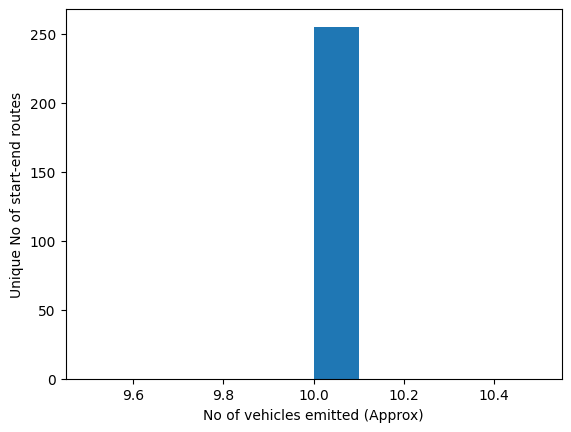

In [87]:
plt.hist(flows_2.values())
plt.xlabel('No of vehicles emitted (Approx)')
plt.ylabel('Unique No of start-end routes')